In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [26]:
sales1 = pd.read_csv('SalesO1.csv')

In [27]:
sales1.head()

,SKU,Product - English Name,Product - Chinese Name,Date of Sale,Amount Sold,Percentage Point Change
0,A013,Mushroom Combo,????,2018/01/01,14,0
1,A013,Mushroom Combo,????,2018/01/02,7,-50
2,A013,Mushroom Combo,????,2018/01/03,7,0
3,A013,Mushroom Combo,????,2018/01/04,6,-14.28571429
4,A013,Mushroom Combo,????,2018/01/05,15,150


In [28]:
sales1

,SKU,Product - English Name,Product - Chinese Name,Date of Sale,Amount Sold,Percentage Point Change
0,A013,Mushroom Combo,????,2018/01/01,14,0
1,A013,Mushroom Combo,????,2018/01/02,7,-50
2,A013,Mushroom Combo,????,2018/01/03,7,0
3,A013,Mushroom Combo,????,2018/01/04,6,-14.28571429
4,A013,Mushroom Combo,????,2018/01/05,15,150
...,...,...,...,...,...,...
14287,A006-2,Bamboo Shoot (Half),??????,2020/12/27,2,100
14288,A006-2,Bamboo Shoot (Half),??????,2020/12/28,1,-50
14289,A006-2,Bamboo Shoot (Half),??????,2020/12/29,1,0
14290,A006-2,Bamboo Shoot (Half),??????,2020/12/30,1,0


In [29]:
sales1.describe()

,Amount Sold
count,14292.000000
mean,6.185418
std,5.955228
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,70.000000


In [30]:
uncleaned_data = pd.DataFrame(data= sales1)

In [31]:
uncleaned_data.dropna()

,SKU,Product - English Name,Product - Chinese Name,Date of Sale,Amount Sold,Percentage Point Change
0,A013,Mushroom Combo,????,2018/01/01,14,0
1,A013,Mushroom Combo,????,2018/01/02,7,-50
2,A013,Mushroom Combo,????,2018/01/03,7,0
3,A013,Mushroom Combo,????,2018/01/04,6,-14.28571429
4,A013,Mushroom Combo,????,2018/01/05,15,150
...,...,...,...,...,...,...
14287,A006-2,Bamboo Shoot (Half),??????,2020/12/27,2,100
14288,A006-2,Bamboo Shoot (Half),??????,2020/12/28,1,-50
14289,A006-2,Bamboo Shoot (Half),??????,2020/12/29,1,0
14290,A006-2,Bamboo Shoot (Half),??????,2020/12/30,1,0


In [33]:
uncleaned_data.drop(columns = ['Product - Chinese Name', 'Product - English Name'])

,SKU,Date of Sale,Amount Sold,Percentage Point Change
0,A013,2018/01/01,14,0
1,A013,2018/01/02,7,-50
2,A013,2018/01/03,7,0
3,A013,2018/01/04,6,-14.28571429
4,A013,2018/01/05,15,150
...,...,...,...,...
14287,A006-2,2020/12/27,2,100
14288,A006-2,2020/12/28,1,-50
14289,A006-2,2020/12/29,1,0
14290,A006-2,2020/12/30,1,0


In [34]:
grouped = uncleaned_data.groupby(uncleaned_data.SKU)


In [42]:
A0011 = grouped.get_group("A001-1")
A0021 = grouped.get_group("A002-1")
A0022 = grouped.get_group("A002-2")
A0031 = grouped.get_group("A003-1")
A0032 = grouped.get_group("A003-2")
A0041 = grouped.get_group("A004-1")
A0042 = grouped.get_group("A004-2")
A0051 = grouped.get_group("A005-1")
A0061 = grouped.get_group("A006-1")
A0062 = grouped.get_group("A006-2")
A0071 = grouped.get_group("A007-1")
A0081 = grouped.get_group("A008-1")
A0091 = grouped.get_group("A009-1")
A0101 = grouped.get_group("A010-1")
A0111 = grouped.get_group("A011-1")
A0121 = grouped.get_group("A012-1")
A013 = grouped.get_group("A013")
A014 = grouped.get_group("A014")

In [12]:
feature_cols = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data_cleaned[feature_cols]
y = data_cleaned['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

# Logistic Regression 


Logistic Regression is a form of regression analysis; it is used when the dependent variable is dichotomous or binary. Like all regression analyses, the logistic regression is a predictive tool. It is used to describe data and explain the relationships between one dependent binary variable and one or more independent variables.

In our case, we are utilizing the `binary logistic regression analysis` as our dependent variable [Outcome] is binary, either Yes (1) or No (0).


In [13]:
import warnings
warnings.simplefilter(action='ignore')

logreg = LogisticRegression()

logreg.fit(x_train,y_train)

log_pred= logreg.predict(x_test)

In order to evaluate the performance of the classification model, a confusion matrix can be used to show the correct and incorrect predictions.

Text(0.5, 39.5, 'Predicted')

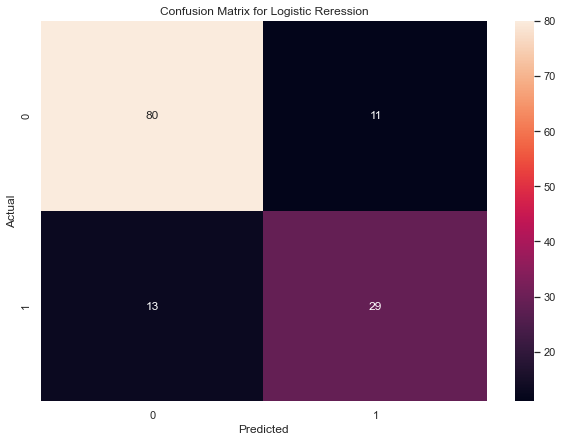

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Logistic Reression', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Description of Metrics

Metrics are used to quantify the quality of a model's predictions.  

>`Accuracy Score` = (True Posititve + True Negative) / Total

>`Precision Score` = True Positive / Actual Results OR True Posititve / (True Positive + True Negative) 

>`Recall Score` = True Posititve / Predicted Results OR True Positive / (True Positive + False Negative) 

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, log_pred))
print("Precision:",metrics.precision_score(y_test, log_pred))
print("Recall:",metrics.recall_score(y_test, log_pred))

Accuracy: 0.8195488721804511
Precision: 0.725
Recall: 0.6904761904761905


> `ROC Curve:` Receiver Operating Characteristic Curve

The Receiver Operating Characteristics (ROC) summarizes the prediction performance of a classification model at all classification thresholds. In essence, the ROC curve plots the true positive rate (y-axis) against the false positive rate (x-axis). 

> `ROC AUC Score:` Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

The Area Under the Curve (AUC) metric indicates the degree or measure of separability (ability to distinguish if the outcome is a 1 or 0). The closer the score is to 1, the better the ability of the model to predict the outcome. 

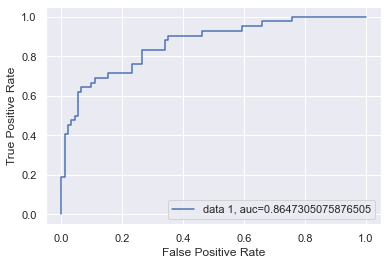

In [16]:
log_prob = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  log_prob)
lgauc = metrics.roc_auc_score(y_test, log_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(lgauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

>`log_prob = logreg.predict_proba(x_test)[::,1]`

Probabilities for the positive outcome is kept.

# Random Forest Classification

At this point, we are starting the Random Forest Classificaiton.

The Random Forest Classification works by having a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes the model’s prediction. 

In our case, the number of trees that we are utilizing is 100, hence `n_estimators = 100` 

In [17]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

rf_prob = random_forest.predict_proba(x_test)[::,1]
rf_pred = random_forest.predict(x_test)
rfauc = metrics.accuracy_score(y_test,rf_pred)

# Feature Importances 

The measurements of importances of the features in the Random Forest Classification problem is based of the Gini Impurity or Information Gain. When we train a tree, we compute how much each feature contributes to decreasing the weighted impurity. We are using `feature_importances_`; this function aims at averaging the decrease in impurity over trees.


From this, we are able to see that `Glucose` is the most important feature. 

In [18]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(8)

,importance
feature,
Glucose,0.250
Age,0.151
BMI,0.133
DiabetesPedigreeFunction,0.112
Insulin,0.105
SkinThickness,0.097
Pregnancies,0.076
BloodPressure,0.076



Instead of viewing the importance of the features in a Data Frame, visualizing the importances in a bar chart can be more useful. 


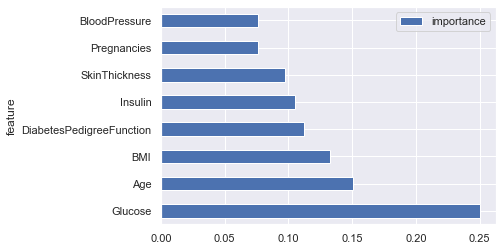

In [19]:
importances.plot.barh()

Once again, we can use a confusion matrix to show the correct and incorrect predictions in order to evaluate the effectiveness of our model

Text(0.5, 39.5, 'Predicted')

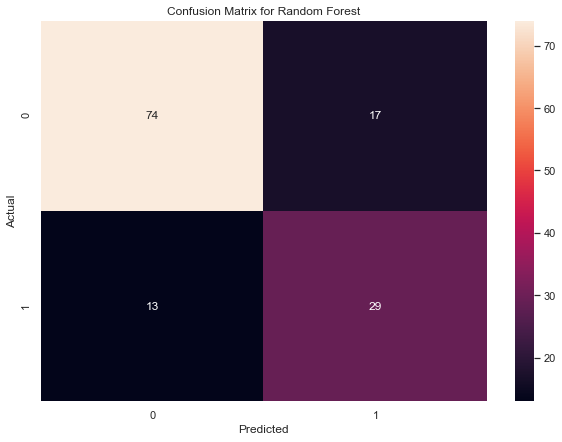

In [20]:
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm_rf, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))

Accuracy: 0.7744360902255639
Precision: 0.6304347826086957
Recall: 0.6904761904761905


# Gaussian Naive Bayes 

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

Gaussian Naive Bayes is an extension of the Naive Bayes Theorem. Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because it aids to estimate the mean and standard deviation from the training data.

At this point, we are starting the GaussianNB 

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_prob = nb.predict_proba(x_test)[::,1]

In [23]:
nbpred = nb.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, nbpred))
print("Precision:",metrics.precision_score(y_test, nbpred))
print("Recall:",metrics.recall_score(y_test, nbpred))

Accuracy: 0.7894736842105263
Precision: 0.6590909090909091
Recall: 0.6904761904761905


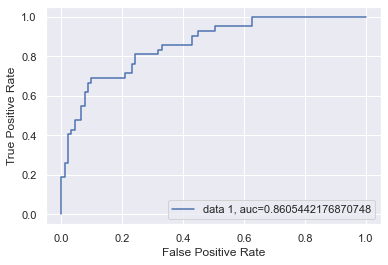

In [24]:
nbfpr, nbtpr, _ = metrics.roc_curve(y_test, nb_prob)
nbauc = metrics.roc_auc_score(y_test, nb_prob)
plt.plot(nbfpr,nbtpr,label="data 1, auc="+str(nbauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

Now, we will begin comparing the 3 classification models we have used so far: Random Forest, Logsitic Regression and Naive Bayes.

We will be using the common metric of ROC AUC, which indicates the degree and quality of the model to predict whether the outcome will be 1 or 0. 

In [25]:
print('Random Forest: AUROC = %.4f' % (rfauc))
print('Naive Bayes: AUROC = %.4f' % (nbauc))
print('Logistic Regression: AUROC = %.4f' % (lgauc))

Random Forest: AUROC = 0.7744
Naive Bayes: AUROC = 0.8605
Logistic Regression: AUROC = 0.8647


In [26]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
lg_fpr, lg_tpr, _ = roc_curve(y_test, log_prob)

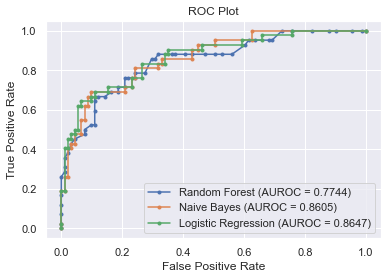

In [27]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rfauc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.4f)' % nbauc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic Regression (AUROC = %0.4f)' % lgauc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

# Improving the Models

Now, using the importance features from the Random Forest Classification, we will select the 4 most important variables and use them exclusively to improve our models.

By using the factors with the most importance, it should help us improve the accuracy of the predictions of our models.

In [28]:
new_factors = data_cleaned[['Glucose', 'Insulin', 'BMI', 'Age']]

In [29]:
newx = new_factors
y = data_cleaned['Outcome']

newx_train, newx_test, newy_train, newy_test = train_test_split(newx,y,test_size=0.25)

# New Logistic Regression

In [30]:
logreg2 = LogisticRegression()

logreg2.fit(newx_train,newy_train)

newlg_pred = logreg2.predict(newx_test)

Text(0.5, 12.5, 'Predicted')

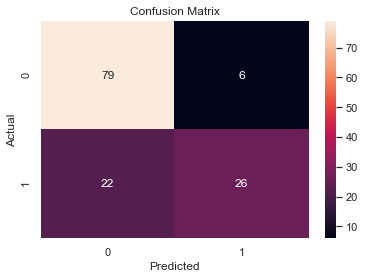

In [31]:
cnf_matrix = metrics.confusion_matrix(newy_test, newlg_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [32]:
print("Accuracy:",metrics.accuracy_score(newy_test, newlg_pred))
print("Precision:",metrics.precision_score(newy_test, newlg_pred))
print("Recall:",metrics.recall_score(newy_test, newlg_pred))

Accuracy: 0.7894736842105263
Precision: 0.8125
Recall: 0.5416666666666666


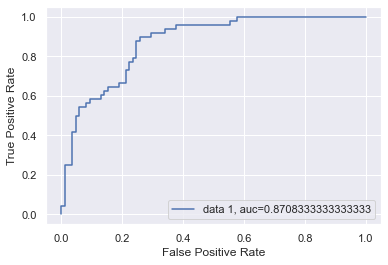

In [33]:
newlg_pred = logreg2.predict_proba(newx_test)[::,1]
lg2fpr, lg2tpr, _ = metrics.roc_curve(newy_test,  newlg_pred)
lg2auc = metrics.roc_auc_score(newy_test, newlg_pred)
plt.plot(lg2fpr,lg2tpr,label="data 1, auc="+str(lg2auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

# New Random Forest

In [34]:
random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(newx_train, newy_train)

newrf_prob = random_forest2.predict_proba(newx_test)[::,1]
newrf_pred = random_forest2.predict(newx_test)
newrfauc = metrics.accuracy_score(newy_test,newrf_pred)

Text(0.5, 39.5, 'Predicted')

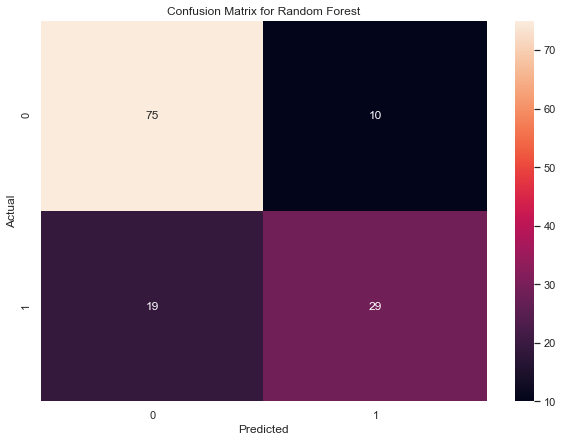

In [35]:
cm_rf2 = confusion_matrix(newy_test, newrf_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm_rf2, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [36]:
print("Accuracy:",metrics.accuracy_score(newy_test, newrf_pred))
print("Precision:",metrics.precision_score(newy_test, newrf_pred))
print("Recall:",metrics.recall_score(newy_test, newrf_pred))

Accuracy: 0.7819548872180451
Precision: 0.7435897435897436
Recall: 0.6041666666666666


# New Gaussian Naive Bayes


In [37]:
nb2 = GaussianNB()
nb2.fit(newx_train, newy_train)
newnb_prob = nb2.predict_proba(newx_test)[::,1]

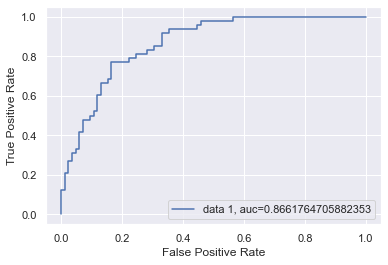

In [38]:
nb2fpr, nb2tpr, _ = metrics.roc_curve(newy_test, newnb_prob)
newnbauc = metrics.roc_auc_score(newy_test, newnb_prob)
plt.plot(nb2fpr,nb2tpr,label="data 1, auc="+str(newnbauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

#  Comparisons with the previous set of Models

Now that we have established new models using the most important features, we will now evaluate the quality and reliability of the models to predict the outcomes. 

In [39]:
print('Random Forest: AUROC = %.4f' % (newrfauc))
print('Naive Bayes: AUROC = %.4f' % (newnbauc))
print('Logistic Regression: AUROC = %.4f' % (lg2auc))

Random Forest: AUROC = 0.7820
Naive Bayes: AUROC = 0.8662
Logistic Regression: AUROC = 0.8708


We can compare the ROC AUC of the Old and New Models. 

>The `ROC AUC` is the degree or measure of separability (ability to distinguish if the outcome is a 1 or 0).

In [40]:
compar = pd.DataFrame(np.array([[rfauc, newrfauc], [nbauc, newnbauc], [lgauc, lg2auc]]), 
                      columns=['Old ROC AUC', 'New ROC AUC'], 
                      index =['Random Forest', 'Gaussian Naive Bayes', 'Logistic Regression'])
compar

,Old ROC AUC,New ROC AUC
Random Forest,0.774436,0.781955
Gaussian Naive Bayes,0.860544,0.866176
Logistic Regression,0.864731,0.870833


In [41]:
rf_fpr2, rf_tpr2, _ = roc_curve(newy_test, newrf_prob)
nb_fpr2, nb_tpr2, _ = roc_curve(newy_test, newnb_prob)
lg_fpr2, lg_tpr2, _ = roc_curve(newy_test, newlg_pred)

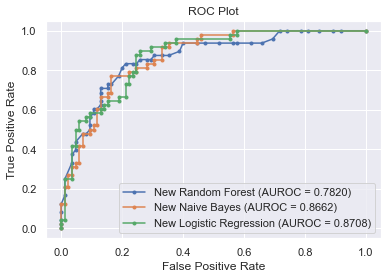

In [42]:
plt.plot(rf_fpr2, rf_tpr2, marker='.', label='New Random Forest (AUROC = %0.4f)' % newrfauc)
plt.plot(nb_fpr2, nb_tpr2, marker='.', label='New Naive Bayes (AUROC = %0.4f)' % newnbauc)
plt.plot(lg_fpr2, lg_tpr2, marker='.', label='New Logistic Regression (AUROC = %0.4f)' % lg2auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

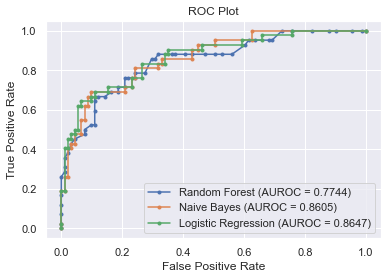

In [43]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rfauc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.4f)' % nbauc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic Regression (AUROC = %0.4f)' % lgauc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()